# Classificação

### Importa as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import precision_score

### Análise superfícial da base utilizada

In [2]:
df = pd.read_csv('games.csv')
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [22]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

## Primeira classificação

1 - Classificar o vencedor baseado em objetivos feitos.

### Definindo a entrada e a saída do problema a ser analisado

In [17]:

X_t1 = df[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 'gameDuration']].copy()
X_t1

X_t2 = df[['t2_towerKills', 't2_inhibitorKills', 't2_baronKills',
       't2_dragonKills', 't2_riftHeraldKills', 'gameDuration']].copy()
X_t2
y = df[['winner']] - 1

### Separando as variáveis em treino e teste, além da definição do número de amostras

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_t1, y, test_size = 0.2)

### Normalização dos dados

In [19]:
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

Z_train = X_train.copy()
Z_train = X_train - mean_train
Z_train = Z_train/std_train

### Validação com KFolds

In [20]:
numberOfFolds = 5
skf = KFold(n_splits=numberOfFolds, shuffle = True)

diffentValueFromK = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
lenghtKArray = len(diffentValueFromK)


In [21]:
precision = np.zeros((numberOfFolds, lenghtKArray))
meandFoldPrecision = []
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    # print('{}º fold'.format(fold))
    for idx, k in enumerate(diffentValueFromK):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Z_train.values[train_index], y_train.values[train_index])

        y_val = y_train.values[val_index]
        y_hat = model.predict(Z_train.values[val_index])

        precision[fold-1, idx] = precision_score(y_val, y_hat)
        # print('{} cluster(s) com {}% de precisão'.format(k, round(precision[fold-1, idx],3)*100))
    meandFoldPrecision.append(round(precision[fold-1, :].mean(), 3))
    # print('')
    # print('')
    fold += 1

### Encontra a melhor média de fold para posteriormente ser plotado

In [8]:
maxMeanPrecision = np.argmax(meandFoldPrecision)
RLmetric = np.round(precision[maxMeanPrecision][:], 3)

In [9]:
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
                    
def plotBars(roundedMetric, title, metricLabel):
    fig, ax = plt.subplots()
    rects = ax.bar(x - width/2, roundedMetric , width)
    # rects1 = ax.bar(x + width/2, roundedMetricKNN , width, label='KNN')

    fig.set_size_inches(12,8)
    ax.set_ylabel(metricLabel)
    ax.set_title('{}'.format(title))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    # ax.legend()
    autolabel(rects, ax)
    # autolabel(rects2, ax)
    fig.tight_layout()

### Plotagem do gráfico de acurácia para o algoritmo de KNN

In [10]:
labels = ['K = 1', 'K = 3', 'K = 5', 'K = 7', 'K = 9', 'K = 11', 'K = 13', 'K = 15', 'K = 17', 'K = 19', 'K = 21']
x = np.arange(len(labels))
width = 0.35

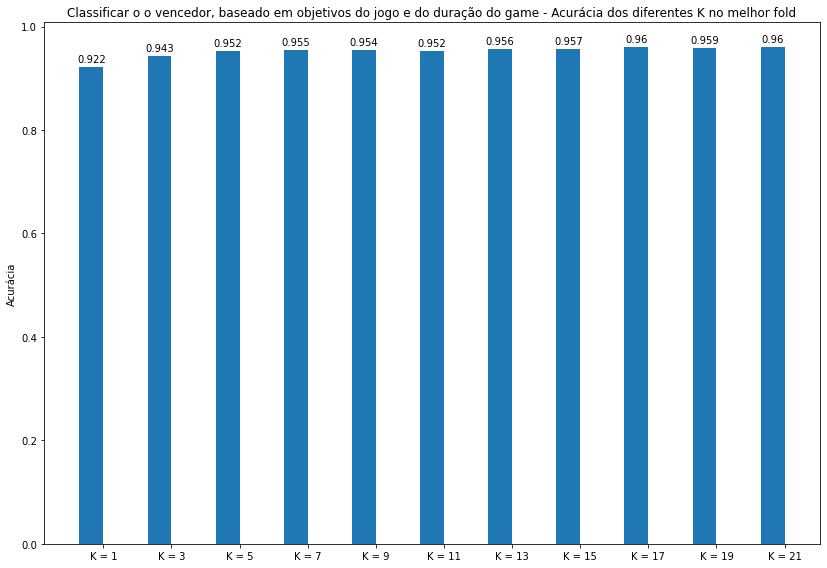

In [16]:
plotBars(RLmetric, 'Classificar o {}, baseado em {} - Acurácia dos diferentes K no melhor fold'.format('o vencedor', 'objetivos do jogo e do duração do game', numberOfFolds), 'Acurácia')

## Segunda classificação

2 - Classificar o vencedor baseado nos primeiros objetivos feitos.

### Definindo a entrada e a saída do problema a ser analisado

In [23]:
# X = df[['t2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
#        't2_ban5']].copy()
X = df[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald']].copy()
y = df[['winner']] - 1

### Separando as variáveis em treino e teste, além da definição do número de amostras

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Normalização dos dados

In [25]:
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

Z_train = X_train.copy()
Z_train = X_train - mean_train
Z_train = Z_train/std_train

### Validação com KFolds

In [27]:
precision = np.zeros((numberOfFolds, lenghtKArray))
meandFoldPrecision = []
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    # print('{}º fold'.format(fold))
    for idx, k in enumerate(diffentValueFromK):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Z_train.values[train_index], y_train.values[train_index])

        y_val = y_train.values[val_index]
        y_hat = model.predict(Z_train.values[val_index])

        precision[fold-1, idx] = precision_score(y_val, y_hat)
        # print('{} cluster(s) com {}% de precisão'.format(k, round(precision[fold-1, idx],3)*100))
    meandFoldPrecision.append(round(precision[fold-1, :].mean(), 3))
    # print('')
    # print('')
    fold += 1

In [28]:
maxMeanPrecision = np.argmax(meandFoldPrecision)
RLmetric = np.round(precision[maxMeanPrecision][:], 3)

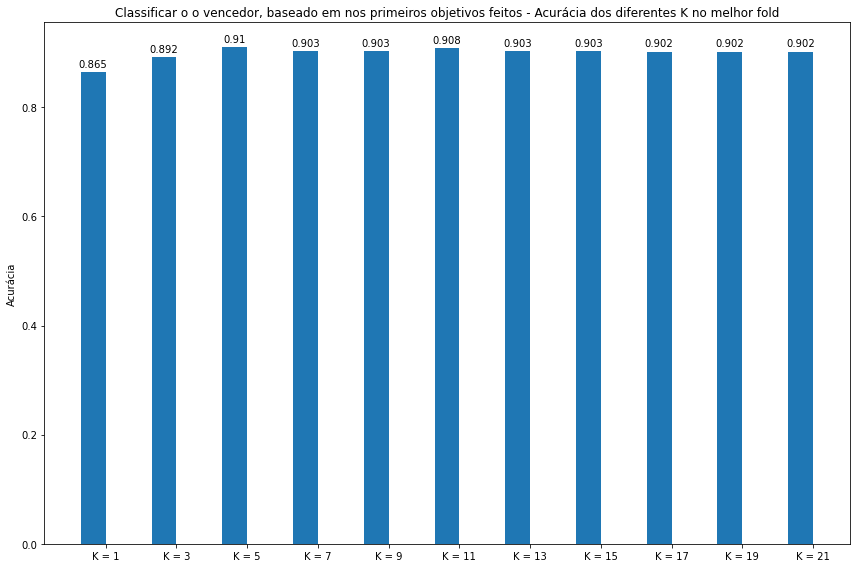

In [29]:
plotBars(RLmetric, 'Classificar o {}, baseado em {} - Acurácia dos diferentes K no melhor fold'.format('o vencedor', 'nos primeiros objetivos feitos', numberOfFolds), 'Acurácia')